Ch 4. 분류 (Classification)

- 지도학습: 레이블 (정답)이 있는 데이터에 대해 학습하는 머신러닝 방식
- 분류: 학습데이터로 피처 & 레이블 값 (= 결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 만들고, 생성된 모델에 새로운 데이터가 들어왔을 때, 레이블 값을 예측하는 것
- 머신러닝 알고리즘의 예: 나이브 베이즈, 로지스틱 회귀, 결정 나무, 서포트 벡터머신(SVM), 최소 근접(NN), 신경망, 앙상블 등

- 앙상블 방법(Ensemble method) for 분류
: 일반적으로 (1) 배깅 (Bagging) ex. 랜덤 포레스트, (2) 부스팅 (Boosting) 방식 ex. XgBoost, LightGBM 으로 나눔
: 대부분 동일한 기본 알고리즘 (결정트리)들을 결합시켜 예측 성능을 더욱 향상

02. 결정 트리 (Decision Tree)

- 데이터 내 규칙을 자동으로 찾아, 나무 기반의 분류규칙을 생성해 줌 

- (1) 결정 노드 (Decision Node): 규칙 조건을 포함하여 (ex. Age>20) Y, N에 따라 두 갈래로 나뉘어 내려가게 됨
- (2) 잎 노드 (Leaf Node): 분리하는 조건이 없는, 마지막 노드 (결정된 분류값)
- 깊이 (depth)가 깊을수록, 과적합 & 낮은 예측성능 발생할 가능성이 높아짐
- 반복적으로 데이터를 분할한 뒤, 모두 특정 분류에 속하게 되면, 분할을 멈추고 분류를 결정함

- 어떻게 나무를 분할(split)할 것인지 노드 규칙이 예측 정확도를 좌우함

- 정보의 균일도 측정: 1) 정보이득, 2) 지니계수
1) 정보이득
: 1-(엔트로피 지수)
- 엔트로피: 데이터 집합의 혼잡도, 동질성이 높은 데이터 그룹이면 엔트로피가 낮아짐 -> 정보이득은 높아짐
- 따라서, 정보이득이 높은 속성을 기준으로 데이터 분할이 이루어짐
2) 지니계수 [0,1]
: 1에 가까울 수록, 불평등 (즉, 균일도가 높음)
- 따라서, 지니계수가 높은 속성을 기준으로 데이터 분할이 이루어짐



결정트리모형의 시각화 (Graphviz 패키지 이용)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#꽃 데이터를 로딩하고, 학습/테스트 데이터셋 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#결정나무분류자 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, 
                impurity=True, filled=True)

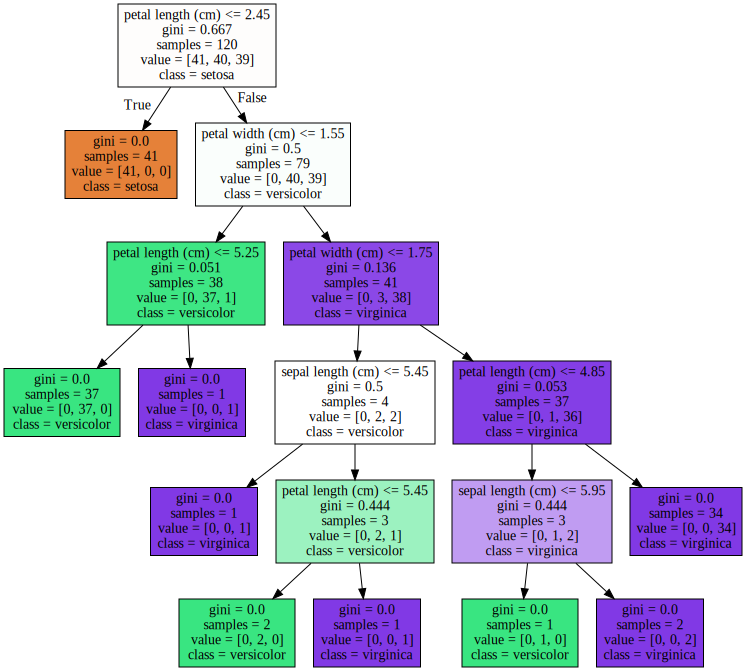

In [3]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


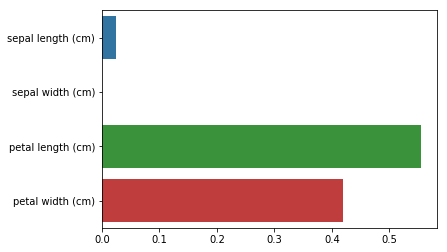

In [4]:
#피처별 중요도 값을 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출하기
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별로 importance 매핑하기
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#feature importance를 열 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

결론: 두 가지 아웃풋 (1) 규칙트리 시각화, 2) 설명변수 중요도 값)을 통해, 결정나무 알고리즘을 활용 가능

<결정나무 과적합(Overfitting)>

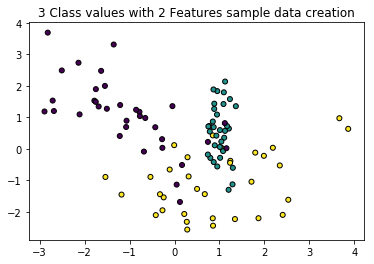

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features sample data creation") #그릴 그래프 내용은 아직 없고, 위에 제목 문자열만 생김

#2차원 그림을 그리기 위해, X(피처)는 2가지, Y(클래스)는 3가지 유형의 분류 샘플 데이터 생성함
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, 
                                         random_state=0)

#점찍기: 2가지 설명변수를 2가지 축으로 하고, 3가지 점 색깔은 Y변수의 범주 3가지별로 다르게 표현함
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k') #market는 소문자 알파벳 o를 사용

C:\Users\Jiwon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


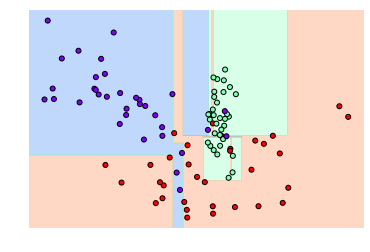

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\Jiwon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


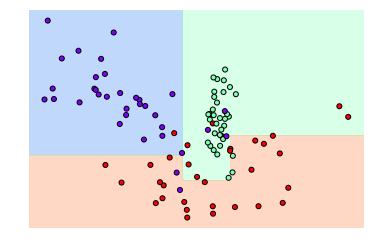

In [7]:
#(min_samples_leaf=6)으로 제약조건 추가 시
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

결정트리 실습: 사용자 행동인식 데이터셋에 대한 예측분류를 수행하기 (결정나무 이용)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#(features.txt)에는 피처이름 인덱스와 피처명이 공백으로 분리돼 있음 (이를 데이터프레임으로 불러옴)
feature_name_df=pd.read_csv('human_activity/features.txt',sep='\s+', #걍 띄어쓰기 한 번 되면서, 엔터는 검은네모 안에 흰 원 기호로 껴있음
                           header=None, names=['column_index','column_name'])

#피처명 인덱스 제거 후, 피처명만 리스트 객체로 생성해서, 샘플 10개 추출
feature_name=feature_name_df.iloc[:,1].values.tolist() #(.iloc[행,열]): 모든행, 2열만 선택해 오기
print('전체 피처명에서 10개만 추출:', feature_name[:10]) #0번째부터 (10-1=)9번째까지 (맨 앞에서부터) 총 10개

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [9]:
import pandas as pd

def get_human_dataset():
    feature_name_df=pd.read_csv('./human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])
    feature_name=feature_name_df.iloc[:,1].values.tolist()
    
    X_train=pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test=pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train=pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test=pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\Jiwon\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
C:\Users\Jiwon\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [10]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [11]:
print(y_train['action'].value_counts()) #['action'] 안 쓰면 에러남

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정나무 예측 정확도:{0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 모수:\n', dt_clf.get_params())

결정나무 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 모수:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [13]:
#트리 깊이가 예측 정확도에 미치는 영향을 비교하기
from sklearn.model_selection import GridSearchCV

params={'max_depth': [6,8,10,12,16,20,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 모수:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.2min finished


GridSearchCV 최고 평균 정확도 수치: 0.8526
GridSearchCV 최적 하이퍼 모수: {'max_depth': 8}


In [14]:
cv_results_df=pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score','mean_train_score']] #(cv_results_df) 데이터셋 내 3개 열만 선택해 출력
#검증 데이터셋 (mean_test_score) 기준: 깊이가 8일 때, 0.852로 정확도가 최상이고, 더 깊어질수록 정확도가 계속 하락함 (과적합에 따른 성능저하)

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850925,0.944848
1,8,0.852557,0.982693
2,10,0.850925,0.993403
3,12,0.844124,0.997212
4,16,0.852149,0.999660
5,20,0.851605,0.999966
6,24,0.850245,1.000000


In [15]:
max_depths=[6,8,10,12,16,20,24]

for depth in max_depths: #위에 7가지 max_depths 각 값마다 순서대로 for문에 넣어 print까지 돌아감 (7번 출력시킴)
    dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test, pred)
    print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8558
max_depth=8 정확도: 0.8707
max_depth=10 정확도: 0.8673
max_depth=12 정확도: 0.8646
max_depth=16 정확도: 0.8575
max_depth=20 정확도: 0.8548
max_depth=24 정확도: 0.8548


In [16]:
#(max_depth), (min_samples_split) 변경하면서 정확도 성능 비교/평가하기
params={'max_depth':[8,12,16,20],
       'min_samples_split':[16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균정확도 값: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 모수:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.7min finished


GridSearchCV 최고 평균정확도 값: 0.8550
GridSearchCV 최적 하이퍼 모수: {'max_depth': 8, 'min_samples_split': 16}


In [17]:
#분리된 테스트 데이터셋에 위 최적 하이퍼 모수를 적용하기
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('결정나무 예측정확도:{0:.4f}'.format(accuracy))

결정나무 예측정확도:0.8717


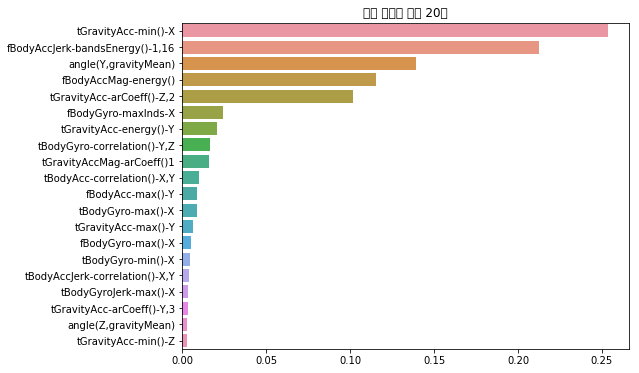

In [18]:
#결정나무에서 각 피처의 중요도 Top 20 막대그래프로 시각화하기
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('피처 중요도 상위 20개')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

03) 앙상블 학습 (Ensemble Learning)
- 여러개의 분류기 (Classifier)를 생성하고, 그 예측을 결합하여, 더 정확한 예측을 달성할 수 있음 (단일 분류기보다 신뢰성이 높음)
- 전통적인 대표 알고리즘: 랜덤 포레스트 (배깅 방법), 그래디언트 부스팅 알고리즘
- 새로운 알고리즘: XGBoost, LightGBM, 스태킹(Staking: 여러 다른 모델의 예측 결과에 기반해 다시 학습데이터로 만들어 다른모델 즉, 메타모형로 재학습시켜 예측함) 등

- 앙상블 학습의 유형:
1) 보팅 (Voting): 다양한 알고리즘을 가진 분류기들을 투표로 결합해 최종 예측
2) 배깅 (Bagging): 하나의 같은 알고리즘을 샘플링을 여러번 하면서 (Bootstrapping 분할방식: 중복추출 허용) 다른 샘플을 가지고 반복한 후 
투표로 결합해 최종 예측
3) 부스팅 (Boosting): 여러 분류기가 순차적으로 학습을 하되, 이전 분류기에서 예측이 틀린 데이터에 대해 다음 분류기에서 가중치(w)를 부여하면서 예측을 진행 (예. 그래디언트 부스트, XGBoost, LightGBM 등)

- 보팅 유형: 
1) 하드 보팅 (:각 분류기마다 결정한 예측값(Y)를 다수결의 원칙에 의해 최종 선정)
2) 소프트 보팅 (더 정확하여 많이 활용되는 방법, 각 분류기마다 레이블 값 예측 확률 
(ex. Y=1,2 두 가지가 존재하는데, 분류기1이 Y=1으로 예측할 확률 0.7, Y=2로 예측할 확률 0.3 (각 분류기별로 확률 값 계산))이 존재할 때, 레이블 값마다 모든 분류기들의 예측확률을 단순평균하여, Y=1으로 예측할 (평균) 확률 0.65 > Y=2으로 예측할 (평균) 확률 0.35 -> Y=1으로 최종 보팅함)

- 보팅 분류기 (VotingClassifier 클래스 활용): 위스콘신 유방암 데이터셋을 예측 분석하기 (로지스틱회귀, KNN을 기반으로 보팅 분류기를 만듬)

In [19]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [20]:
#개별 모형: 1) 로지스틱회귀, 2) KNN
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별모형을 소프트 보팅 기반 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가하기
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#개별모형의 학습/예측/평가하기
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__ #2가지: 1) 로지스틱회귀, 2)KNN의 명칭들을 (class_name) 변수에 대입시킴
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
#결과: 3가지 중, 보팅 분류기의 정확도가 가장 높게 나타남 (대체로 그렇지만, 반드시 그렇지는 않음)

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


04) 랜덤포레스트 (Bagging의 대표적인 알고리즘)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤포레스트 정확도:0.9108


<랜덤포레스트 하이퍼 모수 및 튜닝하기>
- 트리기반 앙상블 알고리즘의 단점: 하이퍼 모수가 많고, 튜닝을 위한 시간이 많이 소모됨
- 다른 방법: GridSearchCV를 이용해 랜덤포레스트의 하이퍼모수를 튜닝하기 (아래 코드 참조)

In [22]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

#랜덤포레스트 분류기 객체 생성 후, GridSearchCV 수행하기
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1) #(n_jobs=-1을 하면 속도 향상됨)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼모수:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼모수:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9166


- 위에서 출력한 하이퍼 모수들을 직접 지정한 후, RandomForestClassifier를 재수행하면 된다 (코드 생략).

05) GBM (Gradient Boosting Machine, 그래디언트 부스트)
- 여러 약한 학습기(Learner)를 순차적으로 학습/예측하며, 잘못 예측한 데이터에 가중치를 주어 오류를 개선해가며 학습하는 방식
- 가중치 업데이트를 경사 하강법 (Gradient Descent)을 이용
- 즉, 반복수행을 통해 오류를 최소화하도록 가중치 업데이트값을 도출하는 기법

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=get_human_dataset()

#GBM 수행시간 출력위함: 시작시간 설정
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy)) #이전 랜덤포레스트보다 개선됨
print('GBM 수행시간: {0:.1f}'.format(time.time()-start_time))

GBM 정확도: 0.9376
GBM 수행시간: 253.5


<GBM 하이퍼 모수 및 튜닝> (생략, P.220~222)

06) XGBoost (eXtra Gradient Boost)
- 트리기반 앙상블학습 중, 유명한 한 알고리즘 (뛰어난 예측성능, 병렬학습이 가능하므로 빠른 학습이 가능)
- XGBoost의 파이썬 패키지명: xgboost > 1) XGBoost 전용 파이썬 패키지 + 2) 사이킷런과 호환되는 래퍼용 XGBoost
- 래퍼 클래스 (Wrapper class): 1) XGBClassifier + 2) XGBRegressor
(래퍼 클래스 덕분에 사이킷런과 연동 가능; 즉, fit(), predict() 등 활용 가능)

In [25]:
#(1) XGBoost 설치하기
#conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier
#conda install -c conda-forge xgboost

#(2) 파이썬 래퍼 XGBoost 하이퍼 모수:
import xgboost
print(xgboost.__version__)

0.90


<파이썬 래퍼 XGBoost 적용하기: 위스콘신 유방암 예측>

In [26]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target

cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [27]:
print(dataset.target_names)
print(cancer_df['target'].value_counts()) #malignant(=0, 악성), benign(=1, 양성)

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [28]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [29]:
#파이썬 래퍼 XGBoost: 학습/테스트용 데이터셋 만들기 위해, 별도의 객체 DMatrix 
#(모수: 1) data (피처 데이터셋), 2) label (레이블 데이터셋(분류일 때) or 숫자형인 종속값 데이터셋(회귀일 때)를 생성함)

#넘파이 형식의 데이터셋을 DMatrix로 변환하기
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test)

In [30]:
#XGBoost 하이퍼모수 설정하기 (딕셔너리 형태로 입력)
params={'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 'early_stoppings':100}
num_rounds=400

#XGBoost 모델 학습하기

#(1) train()에서 필요한 한 모수 wlist 변수를 미리 만들기
wlist=[(dtrain, 'train'), (dtest, 'eval')] #dtrain: 훈련(train) 데이터, dtest: 검증(test)데이터 (dtest 써야 조기중단 기능 작동함)
#(2) xgboost 모듈의 train()함수를 호출: 학습하기 (학습이 완료된 모델객체를 반환해 줌)
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)
#결과: 계속 오류가 감소함

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-logloss:0.087038
[181]	train-logloss:0.006884	eval-logloss:0.086799
[182]	train-logloss:0.006866	eval-logloss:0.086826
[183]	train-logloss:0.006849	eval-log

[326]	train-logloss:0.005354	eval-logloss:0.08578
[327]	train-logloss:0.005348	eval-logloss:0.085857
[328]	train-logloss:0.005342	eval-logloss:0.085939
[329]	train-logloss:0.005336	eval-logloss:0.085825
[330]	train-logloss:0.00533	eval-logloss:0.085869
[331]	train-logloss:0.005324	eval-logloss:0.085893
[332]	train-logloss:0.005318	eval-logloss:0.085922
[333]	train-logloss:0.005312	eval-logloss:0.085842
[334]	train-logloss:0.005306	eval-logloss:0.085735
[335]	train-logloss:0.0053	eval-logloss:0.085816
[336]	train-logloss:0.005294	eval-logloss:0.085892
[337]	train-logloss:0.005288	eval-logloss:0.085936
[338]	train-logloss:0.005283	eval-logloss:0.08583
[339]	train-logloss:0.005277	eval-logloss:0.085909
[340]	train-logloss:0.005271	eval-logloss:0.085831
[341]	train-logloss:0.005265	eval-logloss:0.085727
[342]	train-logloss:0.00526	eval-logloss:0.085678
[343]	train-logloss:0.005254	eval-logloss:0.085721
[344]	train-logloss:0.005249	eval-logloss:0.085796
[345]	train-logloss:0.005243	eval-log

In [32]:
#(3) 학습이 완료되었으므로, 테스트 데이터셋을 가지고 예측 수행하기 (확률값을 반환해 줌)
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표사됨')
print(np.round(pred_probs[:10],3))

#예측확률이 0.5보다 크면 1 (아니면 0)으로 예측값 결정해 리스트 객체 (preds)에 저장하기
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표사됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [36]:
#모델의 예측성능을 평가하기
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
#get_clf_eval(y_test, preds) #(1) y_test: 테스트 실제 레이블 값, (2) preds: 예측 레이블
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


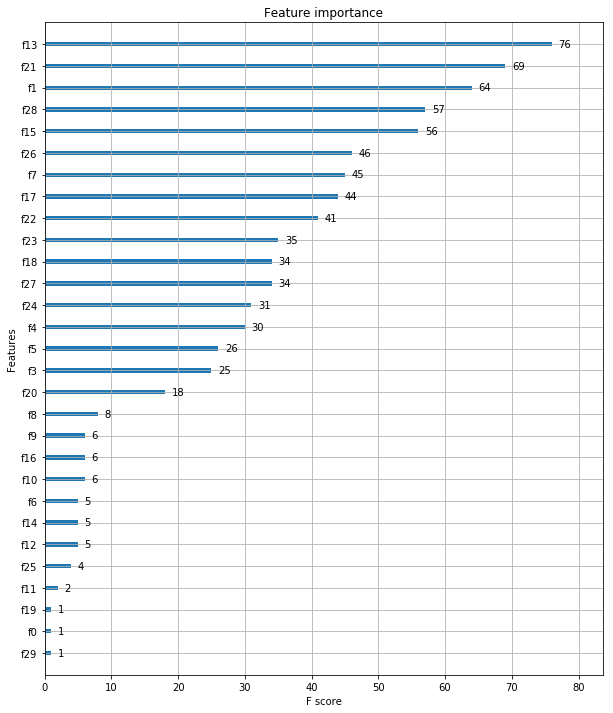

In [37]:
import matplotlib.pyplot as plt #중요도 출력하기 (시각화)
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax) #f0: 1번째 피처, f1: 2번째 피처

<사이킷런 래퍼 XGBoost 개요/적용하기>
- 알고리즘 클래스만 XGBoost 래퍼 클래스로 바꾸면, 기존 명령어를 그대로 활용 가능
- 즉, 사이킷런을 위한 래퍼 XGBoost: 1) XGBClassifier (분류), 2) XGBRegressor (회귀)
- 사이킷런 래퍼 XGBoost는, 전통(기본)적인 파이썬 래퍼 XGBoost와 모수에서 약간 다름

<앞 데이터셋을 XGBClassifier로 예측하기>

In [41]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 불러오기
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds= xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] #교재에 없는데 추가해야 됨

get_clf_eval(y_test , w_preds, w_pred_proba) #3번째 인자 추가해야 함
#결과는 이전과 동일함

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [42]:
#early stopping을 100으로 설정하고 재 학습/예측/평가
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] #교재에 없는데 추가해야 됨

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [43]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba) #3번째 인자 추가해야 함
#211번 반복 시 logloss=0.085593인데, 이후 100회동안 이보다 낮아지면서 개선되지가 않아 멈춤 (311번까지 하다가 마침)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


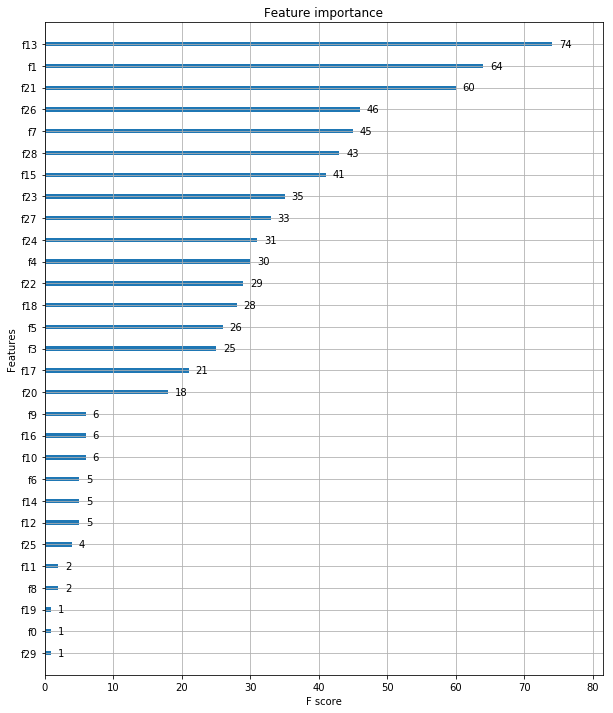

In [44]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)